In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def v(v,f,pos):
    return v+np.clip((-0*(pos+0.5)-0*(v)+f),-1,1)*0.0015 - 0.0025*np.cos(3*pos)
pos_goal = 0.45

In [10]:
samples = 60000
duration = 1000

In [11]:
forces = np.clip(np.random.randn(samples,duration),-1,1)
pos = np.zeros((samples,duration+1))-0.5
vel = np.zeros((samples,))

In [12]:
for i in range(duration):
    vel = v(vel,forces[:,i],pos[:,i])
    pos[:,i+1] = pos[:,i] + vel
    clip_pos_i = pos[:,i+1] < -1.2
    pos[clip_pos_i,i+1] = -1.2
    vel[clip_pos_i] = 0
    
traj_indexes = np.max(pos,1) > pos_goal
ind = np.arange(samples)
inds = ind[traj_indexes]
print(ind)
print(f'wins {np.sum(traj_indexes)}/{samples} = {np.sum(traj_indexes)/samples*100}%')

[    0     1     2 ... 59997 59998 59999]
wins 1035/60000 = 1.725%


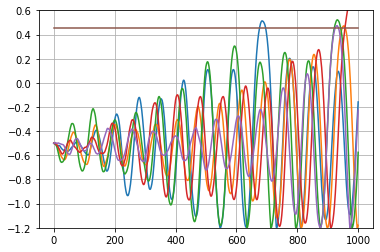

In [69]:
max_plots = 5
plots = 0
for ind in inds:
    plt.plot(pos[ind,:])
    plots += 1
    if plots>=max_plots:
        break
plt.ylim((-1.2,0.6))
plt.plot([0,1000],[pos_goal,pos_goal])
plt.grid(True)